**Carlo R. Caburnay**

**BSCS-3B**

***Mr. Bernardino***



**Part 1: Data Preprocessing**

# **Load the Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv("Netflix_Userbase.csv")
print(df.head())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


# **Missing Values**

In [ ]:
missing_values = df.isna().sum()
print("Missing values count per column:")
print(missing_values)

Missing values count per column:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


# **Encode Categorical Variables**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date'], drop_first=True)
print(df_encoded.head())

# **Feature Selection**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Subscription Type'])
selected_features = ['Monthly Revenue', 'Join Date', 'Last Payment Date']
selected_features.append('Country')

df_selected = df_encoded[selected_features]
print(df_selected.head())

   Monthly Revenue Join Date Last Payment Date         Country
0               10  15-01-22          10-06-23   United States
1               15  05-09-21          22-06-23          Canada
2               12  28-02-23          27-06-23  United Kingdom
3               12  10-07-22          26-06-23       Australia
4               10  01-05-23          28-06-23         Germany


**Part 2: Exploratory Data Analysis (EDA)**

# **Descriptive Statistics**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\nDescriptive Statistics:")
print(df_selected.describe())

# **Visualizations**

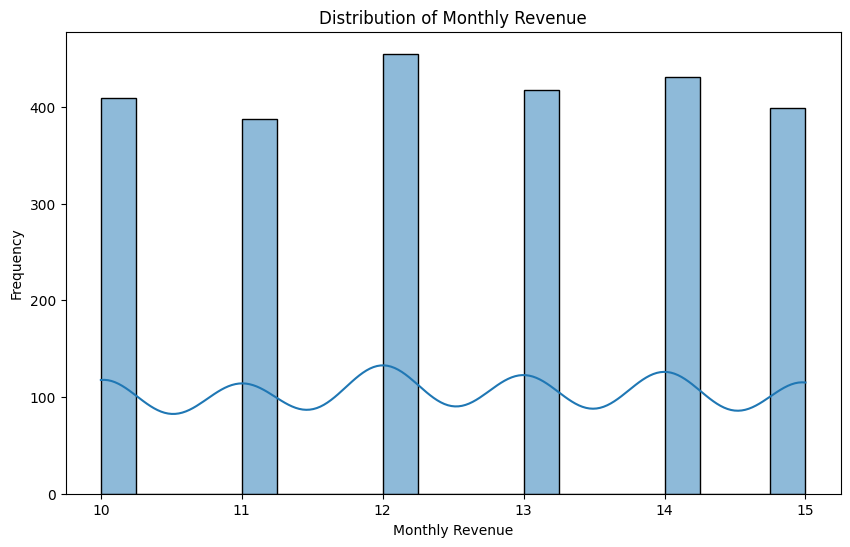

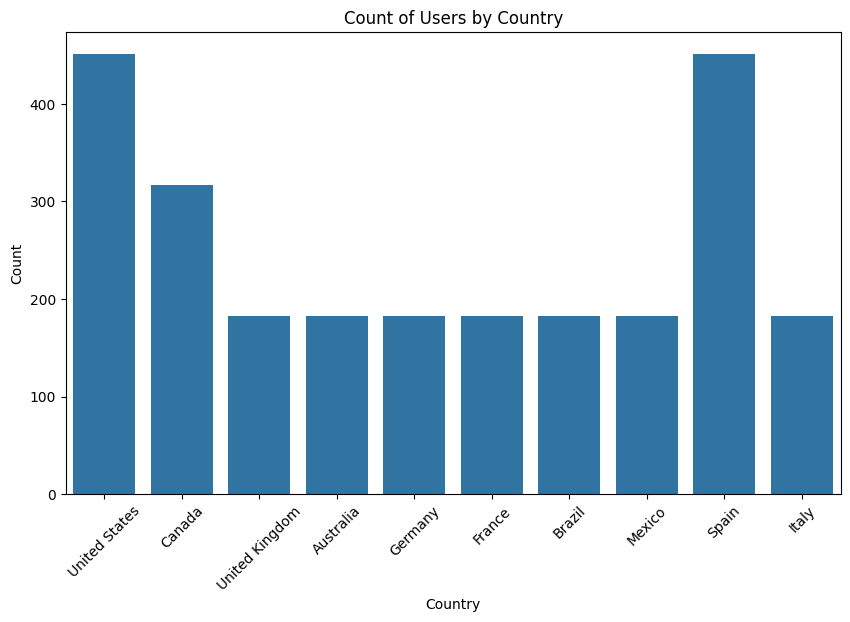

In [ ]:
# Distribution of Monthly Revenue
plt.figure(figsize=(10, 6))
sns.histplot(data=df_selected, x='Monthly Revenue', bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

# User demographics visualization (e.g., countplot for Country)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_selected, x='Country')
plt.title('Count of Users by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Part 3: Linear Regression Model (Predicting Monthly Revenue)**

# **Build the Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# One-hot encoding for Subscription Type
df_encoded = pd.get_dummies(df, columns=['Subscription Type'])

# Convert date columns to datetime
df_encoded['Join Date'] = pd.to_datetime(df_encoded['Join Date'])
df_encoded['Last Payment Date'] = pd.to_datetime(df_encoded['Last Payment Date'])

# Add a feature for the difference in days between join date and last payment date
df_encoded['Days Since Join'] = (df_encoded['Last Payment Date'] - df_encoded['Join Date']).dt.days

# Selecting relevant features
selected_features = ['Days Since Join', 'Country']

# Filter the DataFrame to include only selected features
df_selected = df_encoded[selected_features]

# One-hot encoding for 'Country' feature
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
country_encoded = onehot_encoder.fit_transform(df_selected[['Country']])
country_encoded_df = pd.DataFrame(country_encoded, columns=onehot_encoder.get_feature_names_out(['Country']))

# Concatenate the one-hot encoded 'Country' feature with the existing features
df_final = pd.concat([df_selected.drop('Country', axis=1), country_encoded_df], axis=1)

# Splitting data into features and target variable
X = df_final
y = df_encoded['Monthly Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Model Evaluation**

In [ ]:
# Model Evaluation
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation:")
print("R-squared:", r2)
print("RMSE:", rmse)


Model Evaluation:
R-squared: -0.005339808232712739
RMSE: 1.666404927785812


**Part 4: Logistic Regression Model (Predicting Customer Feedback)**

# **Model Building**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Generate synthetic dataset
np.random.seed(0)
num_samples = 1000

# User demographics
gender = np.random.choice(['Male', 'Female'], num_samples)


# Subscription details
subscription_type = np.random.choice(['Basic', 'Premium'], num_samples)

# Combine into DataFrame
data = pd.DataFrame({
    'Gender': gender,
    'Subscription_Type': subscription_type,
})

# Display the first few rows of the generated dataset
print(data.head())

# Positive feedback comments
positive_comments = [
    "Great service! Really happy with the product.",
    "Excellent experience. The subscription is worth every penny.",
    "Highly satisfied with the service. Will definitely recommend it to others.",
    "Amazing customer support! Prompt responses and helpful staff."
]

# Negative feedback comments
negative_comments = [
    "Terrible service. Waste of money.",
    "Very disappointed with the product. Not what I expected.",
    "Poor customer service. Took ages to resolve my issue.",
    "Unreliable subscription. Constantly facing issues."
]

# Label the feedback comments
data['Feedback'] = np.random.choice(['Positive', 'Negative'], num_samples)

# Assign feedback comments based on labels
data.loc[data['Feedback'] == 'Positive', 'Feedback_Comment'] = np.random.choice(positive_comments, len(data[data['Feedback'] == 'Positive']))
data.loc[data['Feedback'] == 'Negative', 'Feedback_Comment'] = np.random.choice(negative_comments, len(data[data['Feedback'] == 'Negative']))

# Display the first few rows of the dataset with feedback comments
print(data.head())


# Preprocess text data
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Feedback_Comment'])

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Subscription_Type'] = encoder.fit_transform(data['Subscription_Type'])

# Combine text features with other features
X = np.hstack((data[['Gender', 'Subscription_Type',]].values, X_text.toarray()))
y = data['Feedback']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

   Gender Subscription_Type
0    Male           Premium
1  Female             Basic
2  Female           Premium
3    Male             Basic
4  Female             Basic
   Gender Subscription_Type  Feedback  \
0    Male           Premium  Negative   
1  Female             Basic  Negative   
2  Female           Premium  Positive   
3    Male             Basic  Positive   
4  Female             Basic  Positive   

                                    Feedback_Comment  
0  Unreliable subscription. Constantly facing iss...  
1  Unreliable subscription. Constantly facing iss...  
2  Excellent experience. The subscription is wort...  
3  Excellent experience. The subscription is wort...  
4  Amazing customer support! Prompt responses and...  
Accuracy: 1.0
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       109
    Positive       1.00      1.00      1.00        91

    accuracy                           1.00       200
   macro avg       1.00

# **Evaluation**

Model Evaluation:
Accuracy: 0.638
Precision: 0.7086271130726245
Recall: 0.638
F1-score: 0.6353896606089213

Confusion Matrix:
[[150  33   2]
 [ 56  90   0]
 [ 55  35  79]]


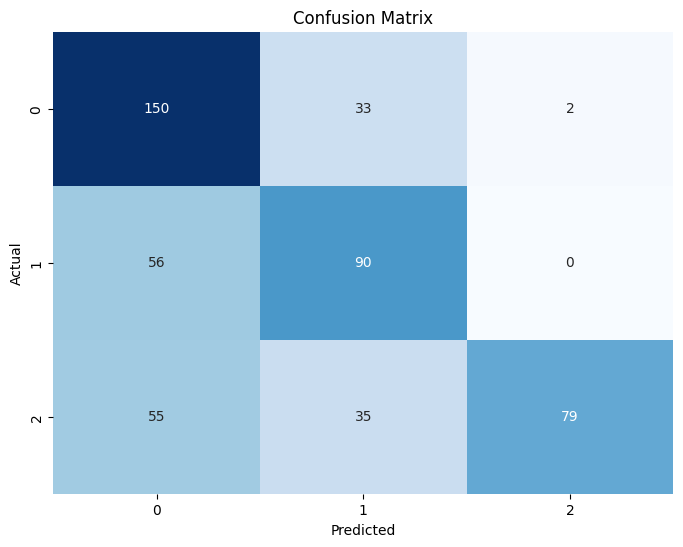

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Dataset
df = pd.read_csv("Netflix_Userbase.csv")

# Select relevant features for prediction
selected_feature = 'Country'  # Change to 'Subscription Type' if needed
df_selected = df[[selected_feature, 'Subscription Type']]

# Perform one-hot encoding for the selected feature
df_encoded = pd.get_dummies(df_selected, columns=[selected_feature], drop_first=True)

# Splitting data into features and target variable
X = df_encoded.drop('Subscription Type', axis=1)
y = df_encoded['Subscription Type']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Specify averaging strategy
recall = recall_score(y_test, y_pred, average='weighted')  # Specify averaging strategy
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify averaging strategy
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Part 5: Comparative Analysis and Visualization**

# **Feature Importance**

<ipython-input-15-2e5473c6bd94>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_coef_logistic, x='Coefficient', y='Feature', palette='magma')


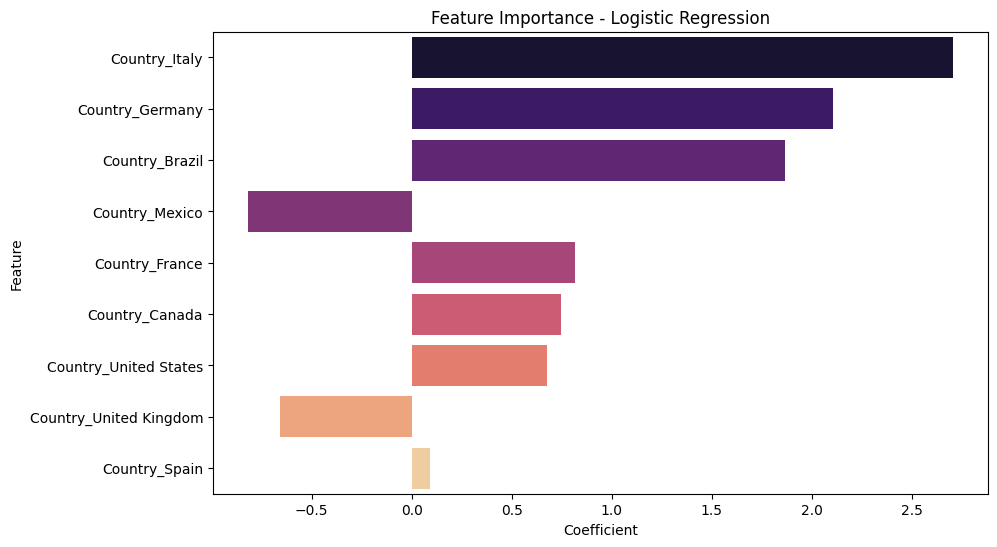

In [ ]:
# Extracting feature coefficients from logistic regression model
feature_coef_logistic = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Sorting coefficients by absolute value to see the most influential features
feature_coef_logistic['Absolute Coefficient'] = abs(feature_coef_logistic['Coefficient'])
feature_coef_logistic = feature_coef_logistic.sort_values(by='Absolute Coefficient', ascending=False)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_coef_logistic, x='Coefficient', y='Feature', palette='magma')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.show()



# **Insights**

In [ ]:
# Insights for Monthly Revenue prediction (Linear Regression)
print("Insights for Monthly Revenue Prediction (Linear Regression):")
print("-------------------------------------------------------------")

# Extracting feature coefficients from linear regression model
feature_coef_linear = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Sorting coefficients by absolute value to see the most influential features
feature_coef_linear['Absolute Coefficient'] = abs(feature_coef_linear['Coefficient'])
feature_coef_linear = feature_coef_linear.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying insights
for index, row in feature_coef_linear.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']}")

print("\n")

# Insights for Feedback prediction (Logistic Regression)
print("Insights for Feedback Prediction (Logistic Regression):")
print("-------------------------------------------------------")

# Extracting feature coefficients from logistic regression model
feature_coef_logistic = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Sorting coefficients by absolute value to see the most influential features
feature_coef_logistic['Absolute Coefficient'] = abs(feature_coef_logistic['Coefficient'])
feature_coef_logistic = feature_coef_logistic.sort_values(by='Absolute Coefficient', ascending=False)

# Displaying insights
for index, row in feature_coef_logistic.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']}")


Insights for Monthly Revenue Prediction (Linear Regression):
-------------------------------------------------------------
Country_Italy: 2.7037993364319806
Country_Germany: 2.1039297568184163
Country_Brazil: 1.8678598838513496
Country_Mexico: -0.8166757861533724
Country_France: 0.8160747866557092
Country_Canada: 0.7462544864535996
Country_United States: 0.6785053661860145
Country_United Kingdom: -0.6577796877283912
Country_Spain: 0.0922825535053012


Insights for Feedback Prediction (Logistic Regression):
-------------------------------------------------------
Country_Italy: 2.7037993364319806
Country_Germany: 2.1039297568184163
Country_Brazil: 1.8678598838513496
Country_Mexico: -0.8166757861533724
Country_France: 0.8160747866557092
Country_Canada: 0.7462544864535996
Country_United States: 0.6785053661860145
Country_United Kingdom: -0.6577796877283912
Country_Spain: 0.0922825535053012
